## Set-up environment

In [ ]:
!pip install rouge

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git@main

  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-o5khagh9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-o5khagh9
  Resolved https://github.com/huggingface/transformers.git to commit f3e96235a324dfd14a3e4ed4535259768b6c9b0e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.2 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7283216 sha256=d49953cfbd695b0d78ea6fcd75e01fbd8c7d0f2ca282aab9ab64817b1eb0eafb
  Stored in directory: /tmp/pip-ephem-wheel-cache-w7ms_6wl/wheels/cf/59/82/6492402e887a68975030bf8c06532260

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.5 MB/s eta 0:00:00


## Load the image captioning dataset

Let's load the image captioning dataset, you just need few lines of code for that.

In [ ]:
from datasets import load_dataset,Dataset

test_set = load_dataset("Multimodal-Fatima/VizWiz_test")
test_dataset = test_set['test']

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/8000 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/Multimodal-Fatima___parquet/Multimodal-Fatima--VizWiz_test-a4496a0043e4e28b/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
val_set = load_dataset("Multimodal-Fatima/VizWiz_validation")
val_dataset = val_set['validation']

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/4319 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/Multimodal-Fatima___parquet/Multimodal-Fatima--VizWiz_validation-0b9cf0fc7da23bc7/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!wget https://vizwiz.cs.colorado.edu/VizWiz_final/images/test.zip
!wget https://vizwiz.cs.colorado.edu/VizWiz_final/images/val.zip

--2023-07-04 19:48:48--  https://vizwiz.cs.colorado.edu/VizWiz_final/images/test.zip
Resolving vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)... 198.59.7.50
Connecting to vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)|198.59.7.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975272799 (3.7G) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]   3.70G   113MB/s    in 22s     

2023-07-04 19:49:10 (173 MB/s) - ‘test.zip’ saved [3975272799/3975272799]

--2023-07-04 19:49:10--  https://vizwiz.cs.colorado.edu/VizWiz_final/images/val.zip
Resolving vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)... 198.59.7.50
Connecting to vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)|198.59.7.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3488913457 (3.2G) [application/zip]
Saving to: ‘val.zip’

val.zip             100%[===================>]   3.25G   229MB/s    in 16s     

2023-07-04 19:49:26 (212 MB/s) - ‘v

In [ ]:
!unzip /content/test.zip
!unzip /content/val.zip

Streaming output truncated to the last 5000 lines.
  inflating: val/VizWiz_val_00005362.jpg  
  inflating: val/VizWiz_val_00000655.jpg  
  inflating: val/VizWiz_val_00007619.jpg  
  inflating: val/VizWiz_val_00000560.jpg  
  inflating: val/VizWiz_val_00006179.jpg  
  inflating: val/VizWiz_val_00001237.jpg  
  inflating: val/VizWiz_val_00002140.jpg  
  inflating: val/VizWiz_val_00004657.jpg  
  inflating: val/VizWiz_val_00003802.jpg  
  inflating: val/VizWiz_val_00002654.jpg  
  inflating: val/VizWiz_val_00007634.jpg  
  inflating: val/VizWiz_val_00005805.jpg  
  inflating: val/VizWiz_val_00003136.jpg  
  inflating: val/VizWiz_val_00001491.jpg  
  inflating: val/VizWiz_val_00002377.jpg  
  inflating: val/VizWiz_val_00001959.jpg  
  inflating: val/VizWiz_val_00004036.jpg  
  inflating: val/VizWiz_val_00004024.jpg  
  inflating: val/VizWiz_val_00005079.jpg  
  inflating: val/VizWiz_val_00004753.jpg  
  inflating: val/VizWiz_val_00003822.jpg  
  inflating: val/VizWiz_val_00000206.jpg  
  i

In [ ]:
def update_filename_column(dataset, path):
    modified_dataset = dataset.map(lambda example: {'filename': path + example['filename']})
    return modified_dataset

In [ ]:
test_dataset = update_filename_column(test_dataset, "/content/test/")
val_dataset = update_filename_column(val_dataset, "/content/val/")

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4319 [00:00<?, ? examples/s]

In [ ]:
def filter_unanswerable(dataset):
    filtered_dataset = dataset.filter(lambda example: example['answer_type'] != 'unanswerable')
    return filtered_dataset

val_dataset = filter_unanswerable(val_dataset)

Filter:   0%|          | 0/4319 [00:00<?, ? examples/s]

In [ ]:
import collections
from tqdm import tqdm
import copy

def add_most_common_answer(dataset):
    # Create a deep copy of the dataset to avoid modifying the original dataset
    modified_dataset = copy.deepcopy(dataset)

    # Initialize an empty list to store the most common answer for each question
    max_answer = []

    # Iterate over the rows in the dataset
    for row in tqdm(modified_dataset, desc='Adding most common answer'):

        # Extract the list of answers for the current question
        answer_list = row['answers']

        # Use a Counter object from the collections module to count the occurrences of each answer
        answer_counts = collections.Counter(answer_list)

        # Extract the most common answer and append it to the 'max_answer' list
        most_common_answer = answer_counts.most_common(1)[0][0]
        max_answer.append(most_common_answer)

    # Add the 'max_answer' column to the modified dataset
    modified_dataset = modified_dataset.add_column('max_answer', max_answer)

    return modified_dataset

val_dataset = add_most_common_answer(val_dataset)

Adding most common answer: 100%|██████████| 2934/2934 [01:37<00:00, 30.19it/s]


Flattening the indices:   0%|          | 0/2934 [00:00<?, ? examples/s]

##Playground

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from transformers import AutoProcessor, BlipForQuestionAnswering

# Load the saved model and processor
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")
trained_model = BlipForQuestionAnswering.from_pretrained("MohammadAlameenArtan/BLIP_VizWiz")
trained_processor = AutoProcessor.from_pretrained("MohammadAlameenArtan/BLIP_VizWiz")

# Choose the device to use
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Move the model to the device
model.to(device)
trained_model.to(device)

BlipForQuestionAnswering(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-05, e

In [ ]:
def load_predictions_and_candidates(file_path_1, file_path_2, file_path_candidates):
    # Load predicted answers from file 1
    with open(file_path_1, 'r') as file_1:
        predicted_answers_1 = [line.strip() for line in file_1.readlines()]

    # Load predicted answers from file 2
    with open(file_path_2, 'r') as file_2:
        predicted_answers_2 = [line.strip() for line in file_2.readlines()]

    # Load candidate answers from the candidates file
    candidate_answers = []
    with open(file_path_candidates, 'r') as file_candidates:
        for line in file_candidates.readlines():
            candidate_answers.append([answer.strip() for answer in line.split('\t')])

    return predicted_answers_1, predicted_answers_2, candidate_answers


base_val, trained_val, candidate = load_predictions_and_candidates('/content/drive/MyDrive/Answers/predicted_answers_val_base.txt', '/content/drive/MyDrive/Answers/predicted_answers_val_trained.txt', '/content/drive/MyDrive/Answers/candidate_answers.txt')


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge

def calculate_scores(base_val, trained_val, candidate):
    # Tokenize the inputs
    base_val = [s.split(', ') for s in base_val]
    trained_val = [s.split(', ') for s in trained_val]
    candidate = [[s[0].split(', ') for s in sublist] for sublist in candidate]

    # Calculate BLEU scores
    bleu_scores = [corpus_bleu([base], cand) for base, cand in zip(base_val, candidate)]

    # Calculate Rouge scores
    rouge = Rouge()
    rouge_scores = [rouge.get_scores(' '.join(train), ' '.join(cand[0])) for train, cand in zip(trained_val, candidate)]

    # Calculate overall scores by averaging
    overall_bleu = sum(bleu_scores) / len(bleu_scores)

    rouge_l = sum([score[0]['rouge-l']['f'] for score in rouge_scores]) / len(rouge_scores)
    rouge_1 = sum([score[0]['rouge-1']['f'] for score in rouge_scores]) / len(rouge_scores)
    rouge_2 = sum([score[0]['rouge-2']['f'] for score in rouge_scores]) / len(rouge_scores)

    overall_rouge = {'rouge-1': rouge_1, 'rouge-2': rouge_2, 'rouge-l': rouge_l}

    return overall_bleu, overall_rouge


In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import torchvision.transforms as transforms

def get_predicted_answer(image_url, question, answer, model, trained_model, processor, trained_processor, device):
    # Get the image from the URL
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    # Prepare inputs for the model
    inputs = processor(images=image, text=question, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generate predictions with the base model
    with torch.no_grad():
        base_outputs = model.generate(**inputs)

    # Generate predictions with the trained model
    with torch.no_grad():
        trained_outputs = trained_model.generate(**inputs)

    # Decode the predicted answers
    predicted_answer_base = processor.decode(base_outputs[0], skip_special_tokens=True)
    predicted_answer_trained = trained_processor.decode(trained_outputs[0], skip_special_tokens=True)

    # Set up the figure layout
    fig, ax = plt.subplots(figsize=(8, 10))

    # Display image
    ax.imshow(image)
    ax.axis('off')

    color_base = 'green' if predicted_answer_base == answer else 'red'
    color_trained = 'green' if predicted_answer_trained == answer else 'red'

    # Display text
    plt.text(0.5, -0.1, f"Question: {question}", fontsize=12, ha='center', transform=ax.transAxes)
    plt.text(0.5, -0.15, f"Base Model: {predicted_answer_base}", fontsize=12, color=color_base, ha='center', transform=ax.transAxes)
    plt.text(0.5, -0.2, f"Trained Model: {predicted_answer_trained}", fontsize=12, color=color_trained, ha='center', transform=ax.transAxes)
    plt.text(0.5, -0.25, f"Correct Answer: {answer}", fontsize=12, ha='center', transform=ax.transAxes)

    plt.show()


In [ ]:
url = 'https://i.pinimg.com/564x/ca/92/40/ca9240d151ac9f6a65ec5514c860c28f.jpg'
question = 'what vehicles are in the picture'
answer = 'car and two planes'

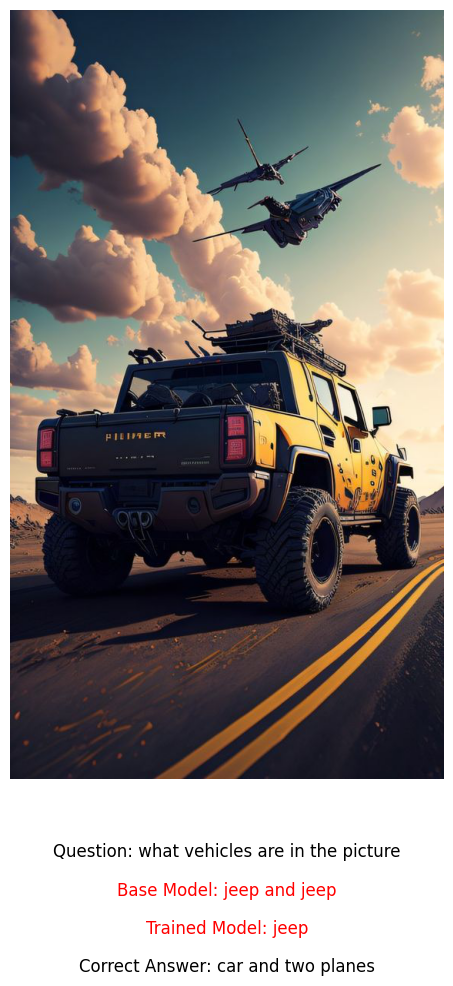

In [ ]:
get_predicted_answer(url, question, answer, model, trained_model, processor, trained_processor, device)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1358: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


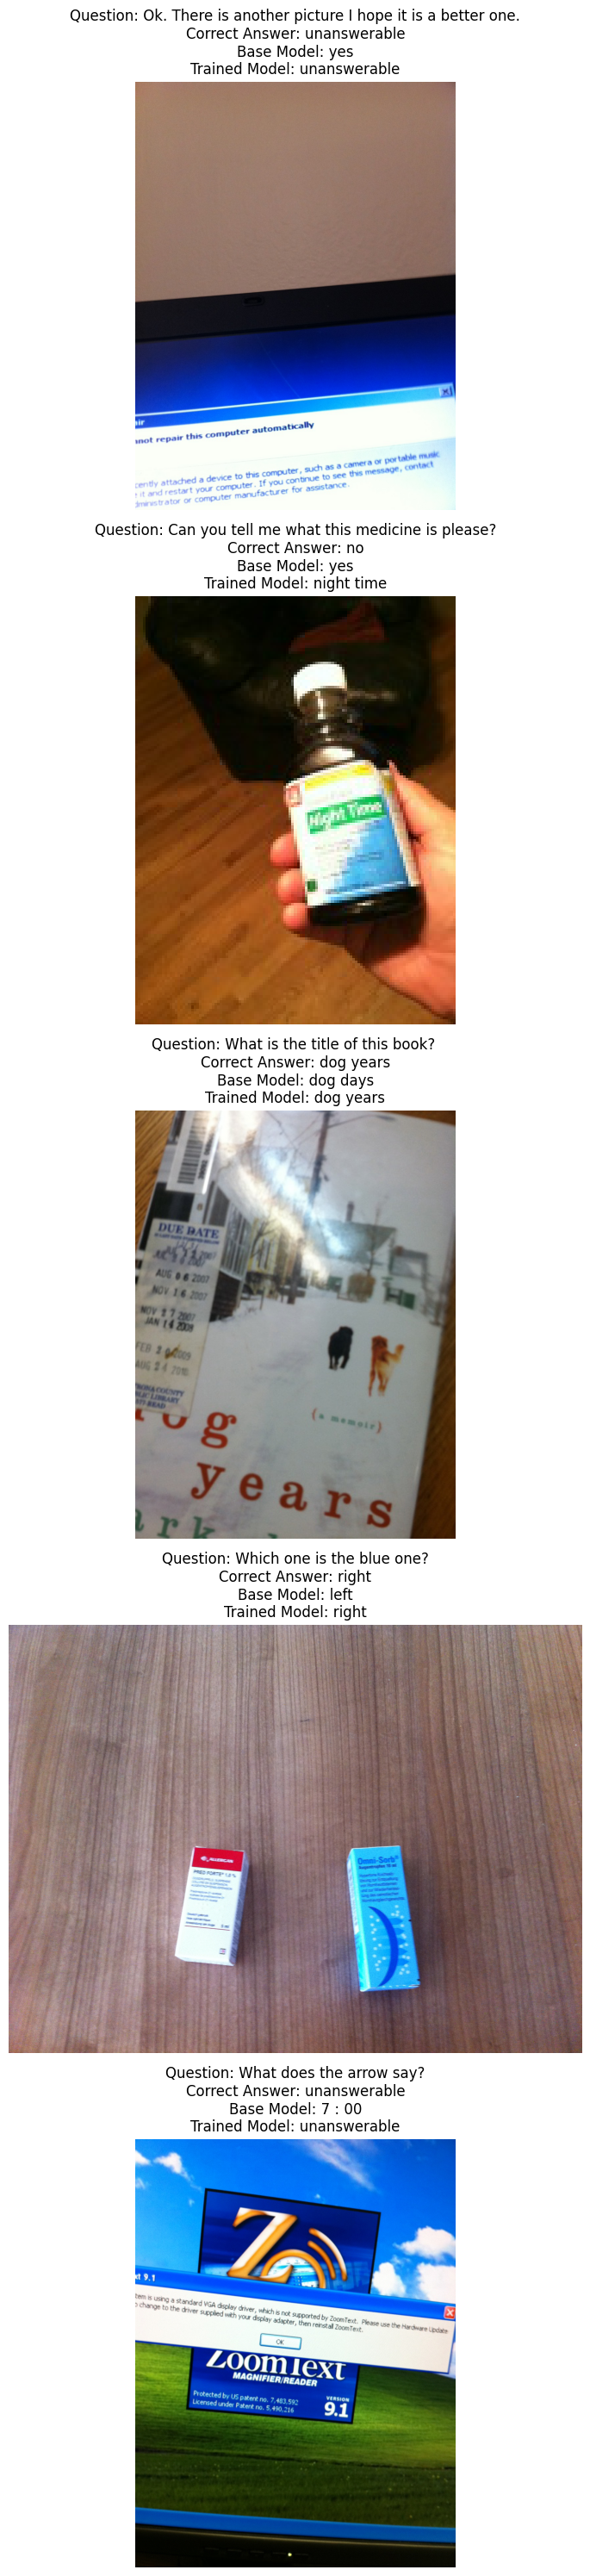

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

model.eval()
trained_model.eval()

# Set the number of images to process
num_images = 5

# Create lists to store the results
image_list = []
question_list = []
base_predicted_answers = []
trained_predicted_answers = []
i = 0

# Iterate through the test set
for item in val_dataset:
    # Load and preprocess the image
    image = item['image']
    image_list.append(image)

    # Get the question
    question = item['question']
    question_list.append(question)

    # Prepare inputs for the model
    inputs = processor(images=image, text=question, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generate predictions with the base model
    with torch.no_grad():
        base_outputs = model.generate(**inputs)

    # Generate predictions with the trained model
    with torch.no_grad():
        trained_outputs = trained_model.generate(**inputs)

    # Decode the predicted answers
    predicted_answer_base = processor.decode(base_outputs[0], skip_special_tokens=True)
    predicted_answer_trained = trained_processor.decode(trained_outputs[0], skip_special_tokens=True)

    base_predicted_answers.append(predicted_answer_base)
    trained_predicted_answers.append(predicted_answer_trained)
    i += 1
    if i > num_images:
        break

# Plot the images along with their questions and predicted answers
fig, axs = plt.subplots(num_images, 1, figsize=(8, 6 * num_images))

for i in range(num_images):
    axs[i].imshow(image_list[i])
    axs[i].axis('off')
    axs[i].set_title("Question: " + question_list[i] + "\nCorrect Answer: " + val_dataset['answers'][i][0] + "\nBase Model: " + base_predicted_answers[i] + "\nTrained Model: " + trained_predicted_answers[i])

plt.tight_layout()
plt.show()
